### 1.Import libraries and set settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

### 2. Load dataset and make some EDA

In [10]:
data_folder = 'datasets'
files_names = os.listdir(data_folder)
data = pd.read_csv(data_folder + '/' + files_names[0])

In [4]:
data.shape

(119390, 32)

In [5]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [30]:
# `hotel`                           - Hotel (H1 = Resort Hotel or H2 = City Hotel)
# `is_canceled`                     - Value indicating if the booking was canceled (1) or not (0)
# `lead_time`                       - Number of days that elapsed between the entering date of the booking
#                                     into the PMS and the arrival date
# `arrival_date_year`               - Year of arrival date
# `arrival_date_month`              - Month of arrival date
# `arrival_date_week_number`        - Week number of year for arrival date
# `arrival_date_day_of_month`       - Day of arrival date
# `stays_in_weekend_nights`         - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
# `stays_in_week_nights`            - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
# `adults`                          - Number of adults
# `children`                        - Number of children
# `babies`                          - Number of babies
# `meal`                            - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal 
# `country`                         - Country of origin. Categories are represented in the ISO 3155–3:2013 format
# `market_segment`                  - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
# `distribution_channel`            - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
# `is_repeated_guest`               - Value indicating if the booking name was from a repeated guest (1) or not (0)
# `previous_cancellations`          - Number of previous bookings that were cancelled by the customer prior to the current booking
# `previous_bookings_not_canceled`  - Number of previous bookings not cancelled by the customer prior to the current booking
# `reserved_room_type`              - Code of room type reserved. Code is presented instead of designation for anonymity reasons.
# `assigned_room_type`              - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from
#                                     the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.
#                                     Code is presented instead of designation for anonymity reasons.
# `booking_changes`                 - Number of changes/amendments made to the booking from the moment the booking
#                                     was entered on the PMS until the moment of check-in or cancellation
# `deposit_type`                    - Indication on if the customer made a deposit to guarantee the booking.
#                                     This variable can assume three categories: No Deposit – no deposit was made;
#                                     Non Refund – a deposit was made in the value of the total stay cost;
#                                     Refundable – a deposit was made with a value under the total cost of stay.
#
# `agent`                           - ID of the travel agency that made the booking
# `company`                         - ID of the company/entity that made the booking or responsible for paying the booking.
#                                     ID is presented instead of designation for anonymity reasons
#
# `days_in_waiting_list`            - Number of days the booking was in the waiting list before it was confirmed to the customer
# `customer_type`                   - Type of booking, assuming one of four categories:
#                                     Contract - when the booking has an allotment or other type of contract associated to it;
#                                     Group – when the booking is associated to a group;
#                                     Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
#                                     Transient-party – when the booking is transient, but is associated to at least other transient booking
#
# `adr`                             - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
# `required_car_parking_spaces`     - Number of car parking spaces required by the customer
# `total_of_special_requests`       - Number of special requests made by the customer (e.g. twin bed or high floor)
#
# `reservation_status`              - Reservation last status, assuming one of three categories:
#                                     Canceled – booking was canceled by the customer;
#                                     Check-Out – customer has checked in but already departed;
#                                     No-Show – customer did not check-in and did inform the hotel of the reason why calendar_today
#
# `reservation_status_date`         - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to 

##### Separating columns into numerical and categorical

In [11]:
numerical_col, categor_col = data.select_dtypes(include=['int', 'float']).columns, data.select_dtypes(include='object').columns

##### Check columns for NA values

In [12]:
na_num_col = data[numerical_col].columns[data[numerical_col].isna().sum() > 0].values

In [13]:
na_num_col

array(['children', 'agent', 'company'], dtype=object)

In [15]:
data['children'].fillna(0, inplace=True)

In [16]:
data['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [20]:
data['agent'].fillna('No info', inplace=True)

In [21]:
data['company'].fillna('No info', inplace=True)

In [22]:
data[categor_col].isna().sum()

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64

In [23]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [24]:
data['country'].fillna('No info', inplace=True)

In [25]:
data[categor_col].describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,178,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [26]:
data[numerical_col].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [29]:
data.columns.values

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'], dtype=object)

In [148]:
calendar = ['January',
'February',
'March',
'April',
'May',
'June',
'July',
'August',
'September',
'October',
'November',
'December']

In [165]:
data.groupby(['arrival_date_month', 'hotel'], as_index=False).agg({'arrival_date_year': 'count'})

,arrival_date_month,hotel,arrival_date_year
0,April,City Hotel,7480
1,April,Resort Hotel,3609
2,August,City Hotel,8983
3,August,Resort Hotel,4894
4,December,City Hotel,4132
5,December,Resort Hotel,2648
6,February,City Hotel,4965
7,February,Resort Hotel,3103
8,January,City Hotel,3736
9,January,Resort Hotel,2193


In [157]:
px.line(data.groupby(['arrival_date_month', 'hotel'], as_index=False).agg({'arrival_date_year': 'count'}), x='arrival_date_month', y='arrival_date_year', line_group='hotel')

In [152]:
data.groupby(['arrival_date_month', 'hotel'], as_index=False).agg({'arrival_date_year': 'count'})

,arrival_date_month,hotel,arrival_date_year
0,April,City Hotel,7480
1,April,Resort Hotel,3609
2,August,City Hotel,8983
3,August,Resort Hotel,4894
4,December,City Hotel,4132
5,December,Resort Hotel,2648
6,February,City Hotel,4965
7,February,Resort Hotel,3103
8,January,City Hotel,3736
9,January,Resort Hotel,2193


<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

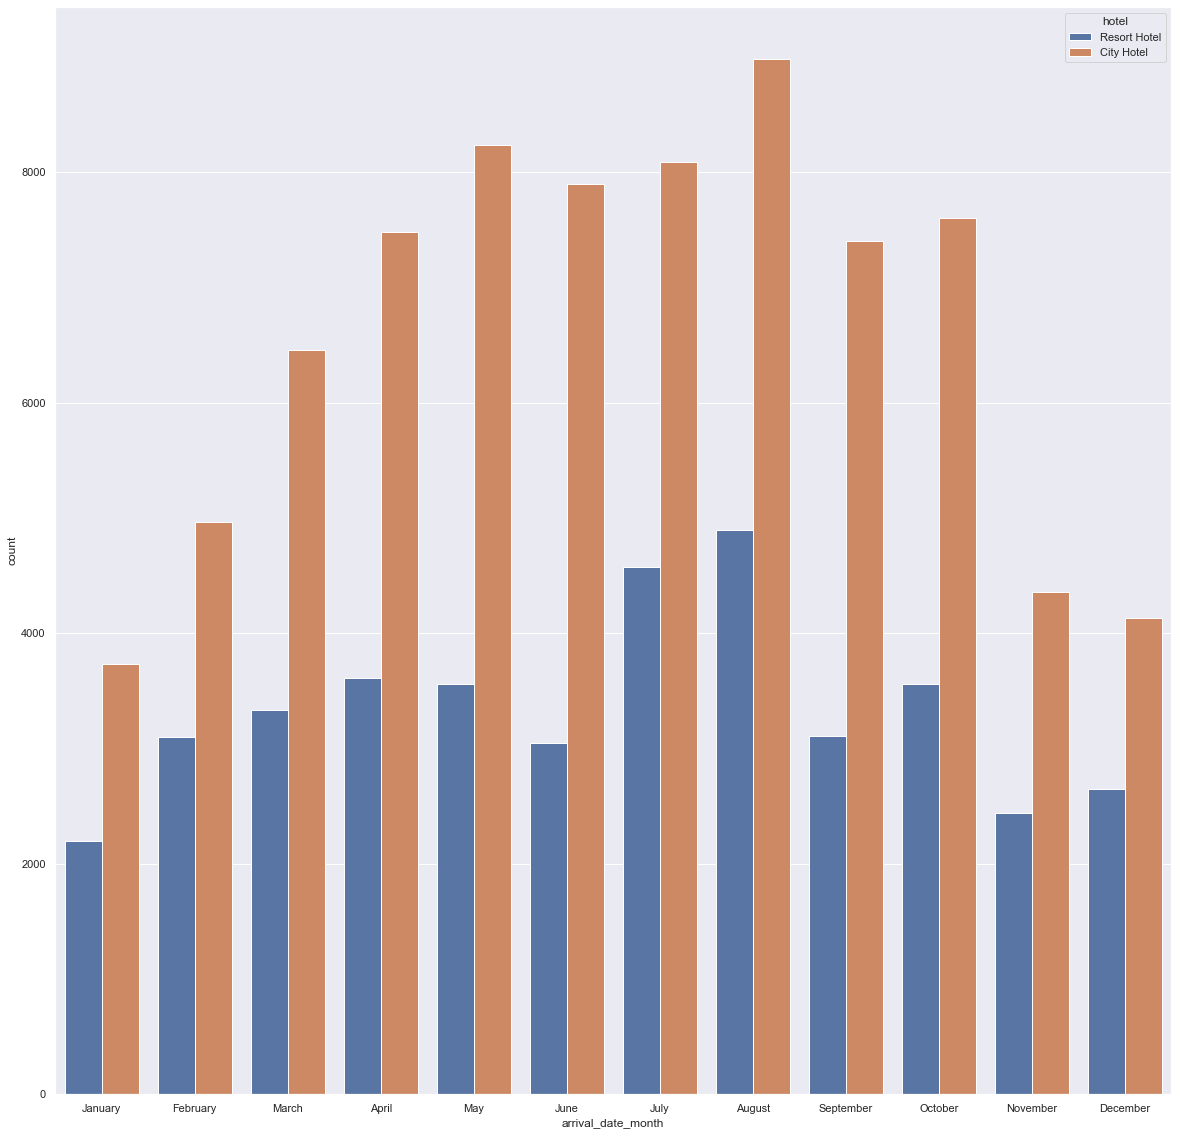

In [132]:
sns.countplot(data=data, x=data['arrival_date_month'], order=calendar, hue=data['hotel'])